In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fitsio
import healpy as hp
import healsparse as hsp
import skyproj

In [2]:
Potential_Class_Cutoffs = [0.5, 1.5, 2.5]
res = 512
likeDir = '/hdfs/bechtol/balrog/y3/y3a2_survey_conditions_maps/Kyle_Stuff/MaximumLikelihood/'
verificationFiles = []
for Class_Cutoff in Potential_Class_Cutoffs:
    verificationFiles.append(likeDir + 'Verification/'+str(Class_Cutoff)+'_Class_Corrected_Star_Counts.fits') 

In [3]:
PIX = []
STARS = []
for file in verificationFiles:
    data = fitsio.read(file)
    PIX.append(data['PIX'])
    STARS.append(data['T_S'])
    
pixCheck = np.full(12*(res**2), True, dtype = bool)
pixCheck[PIX[0]] = False

In [4]:
fullStars = []
for i in np.arange(len(PIX)):
    indStars = np.full(12*(res**2), hp.UNSEEN)
    indStars[PIX[i]] = STARS[i]
    indStars[pixCheck] = hp.UNSEEN
    fullStars.append(indStars)

In [5]:
diffStars = []
for i in np.arange(len(fullStars)):
    indDiff = np.full(12*(res**2), hp.UNSEEN)
    indDiff[PIX[0]] = fullStars[np.maximum(i - 1, 0)][PIX[0]] - fullStars[np.minimum(i + 1, 2)][PIX[0]]
    # indDiff = hp.ud_grade(indDiff, 64, order_in = 'NESTED', order_out = 'NESTED')
    diffStars.append(indDiff)

In [6]:
nside_coverage = 32
hspMaps = []
for i in np.arange(len(diffStars)):
    hspMaps.append(hsp.HealSparseMap(nside_coverage=nside_coverage, healpix_map=diffStars[i]))

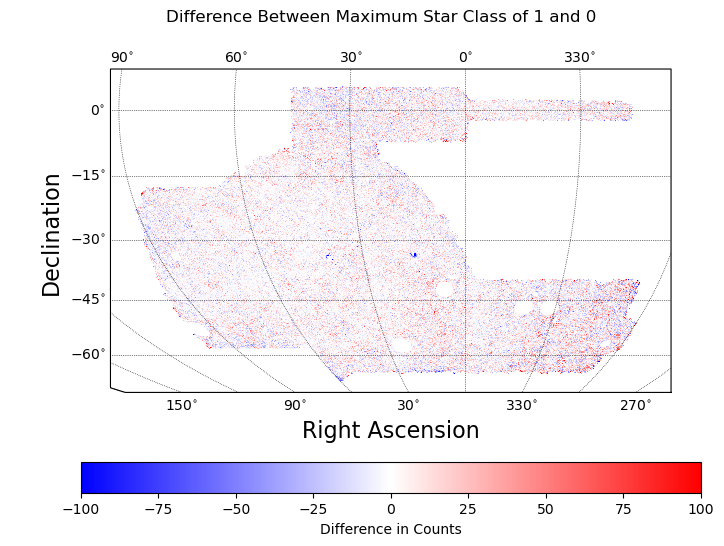

In [7]:
# The default DES projection is a McBrydeSkymap.
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)
sp = skyproj.DESSkyproj(ax=ax)
sp.draw_hspmap(hspMaps[0], cmap = 'bwr')
plt.clim(-100, 100)
plt.colorbar(location = 'bottom', label = 'Difference in Counts')
fig.suptitle('Difference Between Maximum Star Class of 1 and 0')
plt.show()

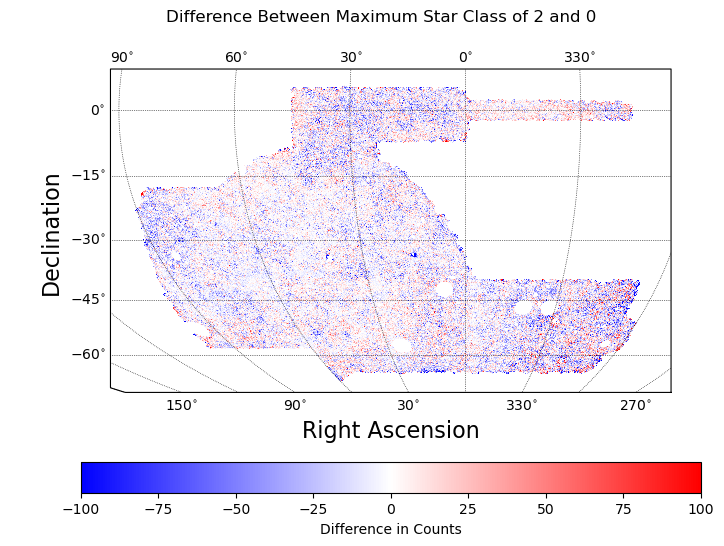

In [8]:
# The default DES projection is a McBrydeSkymap.
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)
sp = skyproj.DESSkyproj(ax=ax)
sp.draw_hspmap(hspMaps[1], cmap = 'bwr')
plt.clim(-100, 100)
plt.colorbar(location = 'bottom', label = 'Difference in Counts')
fig.suptitle('Difference Between Maximum Star Class of 2 and 0')
plt.show()

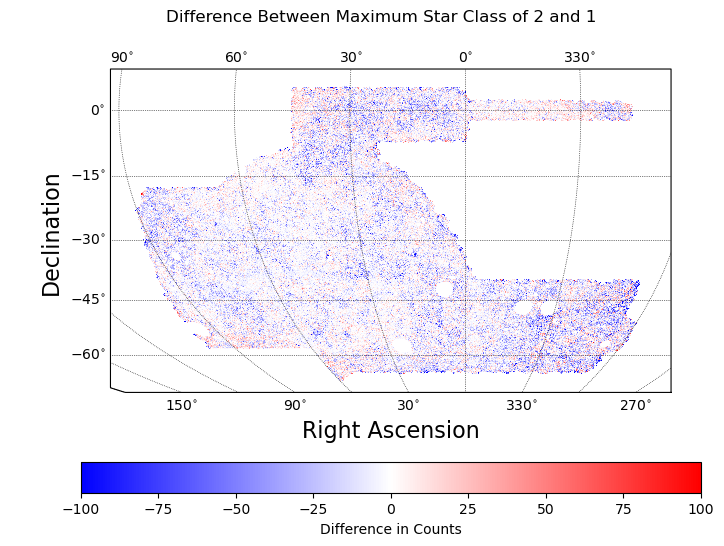

In [9]:
# The default DES projection is a McBrydeSkymap.
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)
sp = skyproj.DESSkyproj(ax=ax)
sp.draw_hspmap(hspMaps[2], cmap = 'bwr')
plt.clim(-100, 100)
plt.colorbar(location = 'bottom', label = 'Difference in Counts')
fig.suptitle('Difference Between Maximum Star Class of 2 and 1')
plt.show()

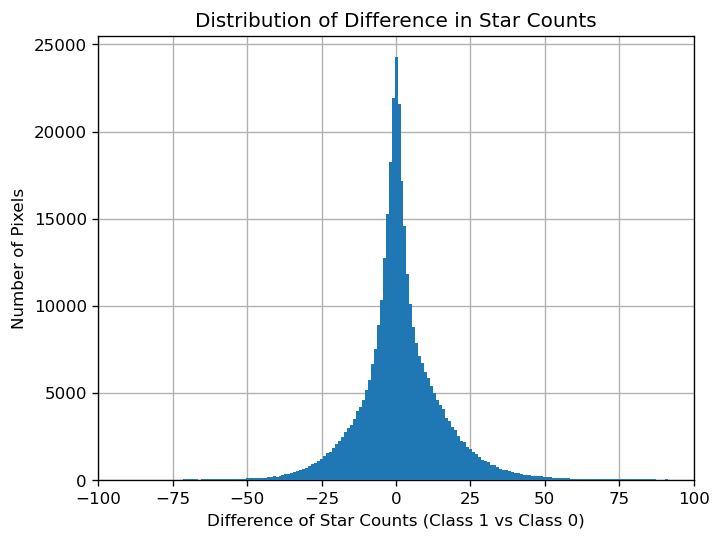

In [10]:
# By default it will clump everything beyond the last bin into it, so go one further.
plt.figure(dpi = 120)
weightCorr = plt.hist(diffStars[0], bins = np.linspace(-101.5, 101.5, 204), zorder = 3)
plt.ylabel('Number of Pixels')
plt.xlabel('Difference of Star Counts (Class 1 vs Class 0)')
plt.title('Distribution of Difference in Star Counts')
plt.grid(zorder = 0)
plt.xlim([-100, 100])
plt.show()

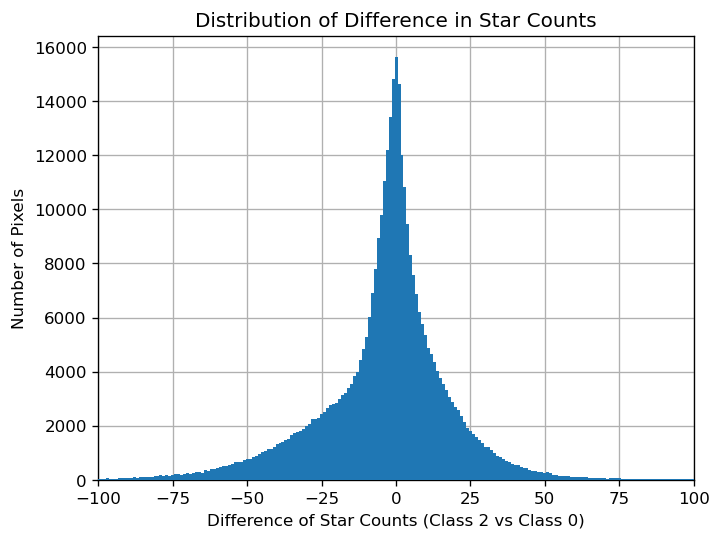

In [11]:
# By default it will clump everything beyond the last bin into it, so go one further.
plt.figure(dpi = 120)
weightCorr = plt.hist(diffStars[1], bins = np.linspace(-101.5, 101.5, 204), zorder = 3)
plt.ylabel('Number of Pixels')
plt.xlabel('Difference of Star Counts (Class 2 vs Class 0)')
plt.title('Distribution of Difference in Star Counts')
plt.grid(zorder = 0)
plt.xlim([-100, 100])
plt.show()

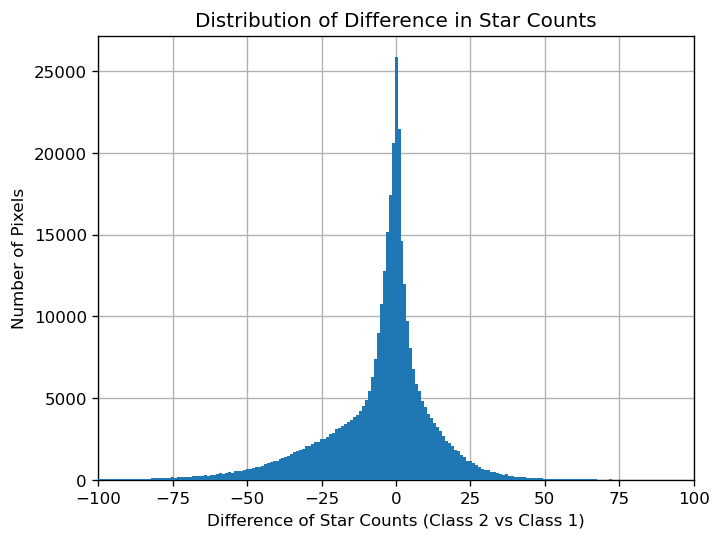

In [12]:
# By default it will clump everything beyond the last bin into it, so go one further.
plt.figure(dpi = 120)
weightCorr = plt.hist(diffStars[2], bins = np.linspace(-101.5, 101.5, 204), zorder = 3)
plt.ylabel('Number of Pixels')
plt.xlabel('Difference of Star Counts (Class 2 vs Class 1)')
plt.title('Distribution of Difference in Star Counts')
plt.grid(zorder = 0)
plt.xlim([-100, 100])
plt.show()

In [13]:
print(np.median(diffStars[0][np.where(diffStars[0] > hp.UNSEEN)[0]]))
print(np.average(diffStars[0][np.where(diffStars[0] > hp.UNSEEN)[0]]))

0.0
1.4458940759460615


In [14]:
print(np.median(diffStars[1][np.where(diffStars[1] > hp.UNSEEN)[0]]))
print(np.average(diffStars[1][np.where(diffStars[1] > hp.UNSEEN)[0]]))

-1.0
-3.699828347429156


In [15]:
print(np.median(diffStars[2][np.where(diffStars[2] > hp.UNSEEN)[0]]))
print(np.average(diffStars[2][np.where(diffStars[2] > hp.UNSEEN)[0]]))

-1.0
-5.145722423375218
